In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tandt-information/transactions_test.csv
/kaggle/input/tandt-information/transactions_train.csv
/kaggle/input/customers-csv/customers.csv
/kaggle/input/rest-of-the-data/terminals.csv
/kaggle/input/rest-of-the-data/merchants.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the datasets into dataframes
customers = pd.read_csv('/kaggle/input/customers-csv/customers.csv')
terminals = pd.read_csv('/kaggle/input/rest-of-the-data/terminals.csv')
merchants = pd.read_csv('/kaggle/input/rest-of-the-data/merchants.csv')
transactions_train = pd.read_csv('/kaggle/input/tandt-information/transactions_train.csv')
transactions_test = pd.read_csv('/kaggle/input/tandt-information/transactions_test.csv')


/tmp/ipykernel_17/4254274142.py:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions_train = pd.read_csv('/kaggle/input/tandt-information/transactions_train.csv')


In [4]:
print("Customers Head:")
print(customers.head(), "\n")

print("Terminals Head:")
print(terminals.head(), "\n")

print("Merchants Head:")
print(merchants.head(), "\n")

Customers Head:
        CUSTOMER_ID  x_customer_id  y_customer_id
0  7894622031164826       7.600289      92.486016
1    65009550197454      97.647808      36.539666
2  5381378528001886      98.643812      46.537793
3   344044685095332       2.814298      57.194127
4  5281794686066290      49.174496      88.879290 

Terminals Head:
   TERMINAL_ID  x_terminal_id  y_terminal__id
0      9754224      41.536730       68.889911
1     37467861      61.864075       20.882662
2     20678215      70.530677       36.567633
3     12724021      92.961874       66.721471
4      2989793      38.756717       68.669003 

Merchants Head:
                            MERCHANT_ID BUSINESS_TYPE  MCC_CODE LEGAL_NAME  \
0  1b7557bb-208b-4fdc-ba91-eca98298541a  Corporations      1711     14b61a   
1  6c948718-ea18-4d07-85d7-0916eb55e699  Corporations      5511     05047b   
2  f0151a49-7ac0-4258-93db-46bee2db6f66  Corporations      5971     e3c9e5   
3  07089d03-0d63-4d24-a3f9-e651fda07cdc  Corporations      7

Customers dataset shape: (50000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CUSTOMER_ID    50000 non-null  int64  
 1   x_customer_id  50000 non-null  float64
 2   y_customer_id  50000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.1 MB
None
        CUSTOMER_ID  x_customer_id  y_customer_id
count  5.000000e+04   50000.000000   50000.000000
mean   4.999431e+15      50.015173      50.233677
std    2.882113e+15      28.867609      28.969675
min    1.495851e+11       0.007194       0.000331
25%    2.528278e+15      24.878218      25.012386
50%    4.976665e+15      50.267847      50.325364
75%    7.484573e+15      74.933497      75.449034
max    9.999981e+15      99.997455      99.999901
Missing values in Customers dataset:
CUSTOMER_ID      0
x_customer_id    0
y_customer_id    0
dtype: int64


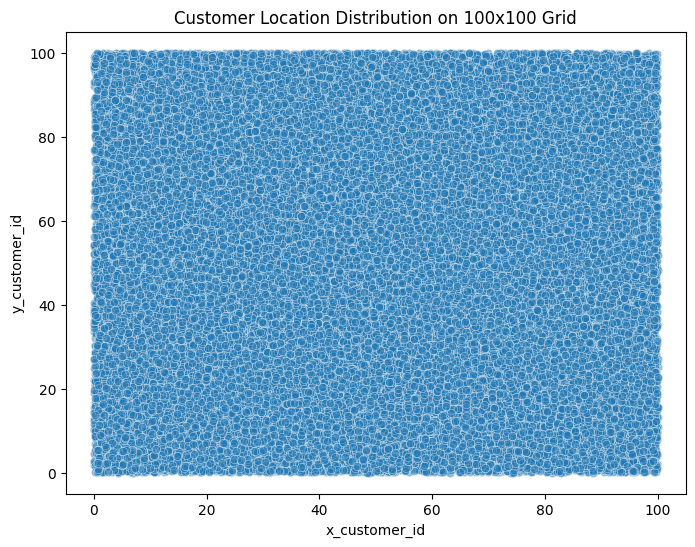

In [5]:
# Customers dataset overview
print("Customers dataset shape:", customers.shape)
print(customers.info())
print(customers.describe())

# Checking for missing values
print("Missing values in Customers dataset:")
print(customers.isnull().sum())

# Visualize the distribution of customer locations on the grid
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x_customer_id', y='y_customer_id', data=customers, alpha=0.5)
plt.title('Customer Location Distribution on 100x100 Grid')
plt.show()


Terminals dataset shape: (5000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TERMINAL_ID     5000 non-null   int64  
 1   x_terminal_id   5000 non-null   float64
 2   y_terminal__id  5000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 117.3 KB
None
        TERMINAL_ID  x_terminal_id  y_terminal__id
count  5.000000e+03    5000.000000     5000.000000
mean   5.007375e+07      49.678916       49.612862
std    2.868702e+07      29.023968       28.899875
min    6.454200e+04       0.007245        0.007370
25%    2.527582e+07      24.775757       24.389356
50%    4.976212e+07      49.375401       49.320768
75%    7.438170e+07      74.370125       75.319330
max    9.999799e+07      99.994897       99.997795
Missing values in Terminals dataset:
TERMINAL_ID       0
x_terminal_id     0
y_terminal__id    0
dtype: int64


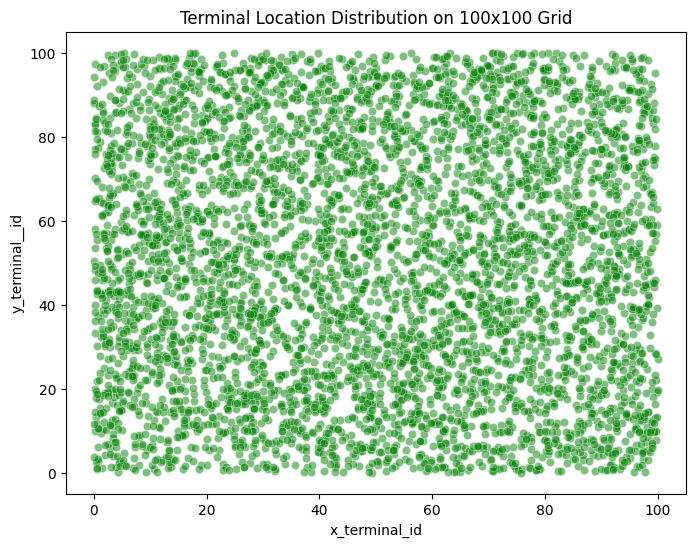

In [6]:
# Terminals dataset overview
print("Terminals dataset shape:", terminals.shape)
print(terminals.info())
print(terminals.describe())

# Checking for missing values
print("Missing values in Terminals dataset:")
print(terminals.isnull().sum())

# Visualize the distribution of terminal locations
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x_terminal_id', y='y_terminal__id', data=terminals, color='green', alpha=0.5)
plt.title('Terminal Location Distribution on 100x100 Grid')
plt.show()


In [7]:
print(terminals.columns)
#the y terminal is weridly named the __ is the same basically 

Index(['TERMINAL_ID', 'x_terminal_id', 'y_terminal__id'], dtype='object')


Merchants dataset shape: (30452, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30452 entries, 0 to 30451
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   MERCHANT_ID                         30452 non-null  object
 1   BUSINESS_TYPE                       30452 non-null  object
 2   MCC_CODE                            30452 non-null  int64 
 3   LEGAL_NAME                          30452 non-null  object
 4   FOUNDATION_DATE                     30452 non-null  object
 5   TAX_EXCEMPT_INDICATOR               30452 non-null  bool  
 6   OUTLET_TYPE                         30452 non-null  object
 7   ACTIVE_FROM                         30452 non-null  object
 8   TRADING_FROM                        30452 non-null  object
 9   ANNUAL_TURNOVER_CARD                30452 non-null  int64 
 10  ANNUAL_TURNOVER                     30452 non-null  int64 
 11  AVERAGE_TICKET_SA

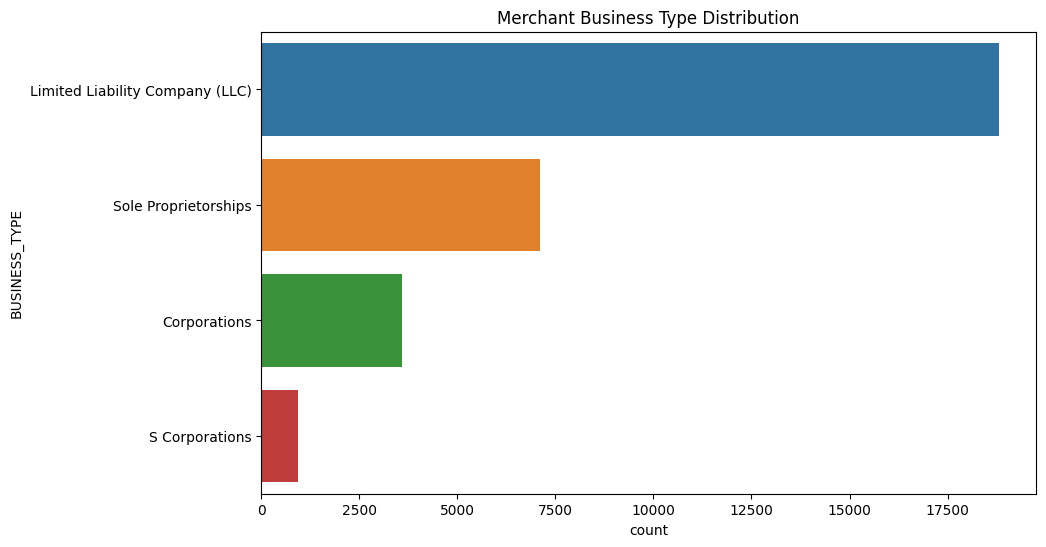

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


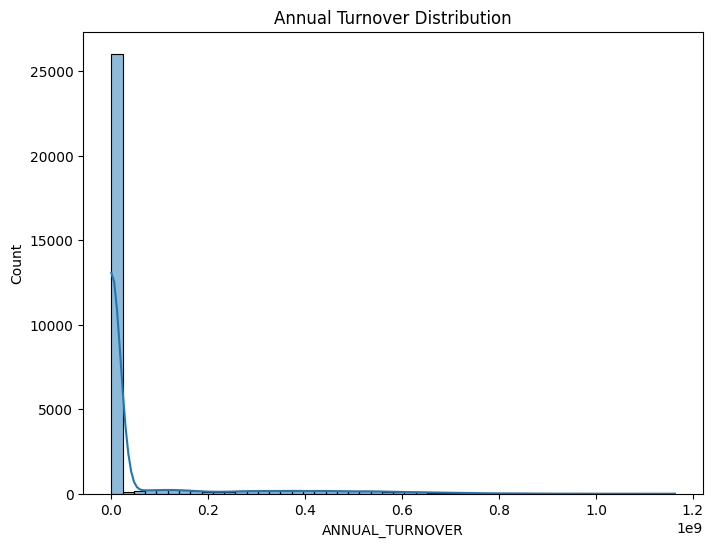

In [8]:
# Merchants dataset overview
print("Merchants dataset shape:", merchants.shape)
print(merchants.info())
print(merchants.describe())

# Checking for missing values
print("Missing values in Merchants dataset:")
print(merchants.isnull().sum())

# Visualize Merchant Business Type distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='BUSINESS_TYPE', data=merchants, order=merchants['BUSINESS_TYPE'].value_counts().index)
plt.title('Merchant Business Type Distribution')
plt.show()

# Visualize Annual Turnover distribution
plt.figure(figsize=(8, 6))
sns.histplot(merchants['ANNUAL_TURNOVER'], bins=50, kde=True)
plt.title('Annual Turnover Distribution')
plt.show()


In [9]:
# column spefic data
#MERCHANT_ID (STRING)
#This is a unique identifier for each merchant.
# Check for duplicates and missing values
print("Number of unique merchants:", merchants['MERCHANT_ID'].nunique())
print("Missing values in MERCHANT_ID:", merchants['MERCHANT_ID'].isnull().sum())



Number of unique merchants: 30452
Missing values in MERCHANT_ID: 0


BUSINESS_TYPE
Limited Liability Company (LLC)    18816
Sole Proprietorships                7109
Corporations                        3586
S Corporations                       941
Name: count, dtype: int64


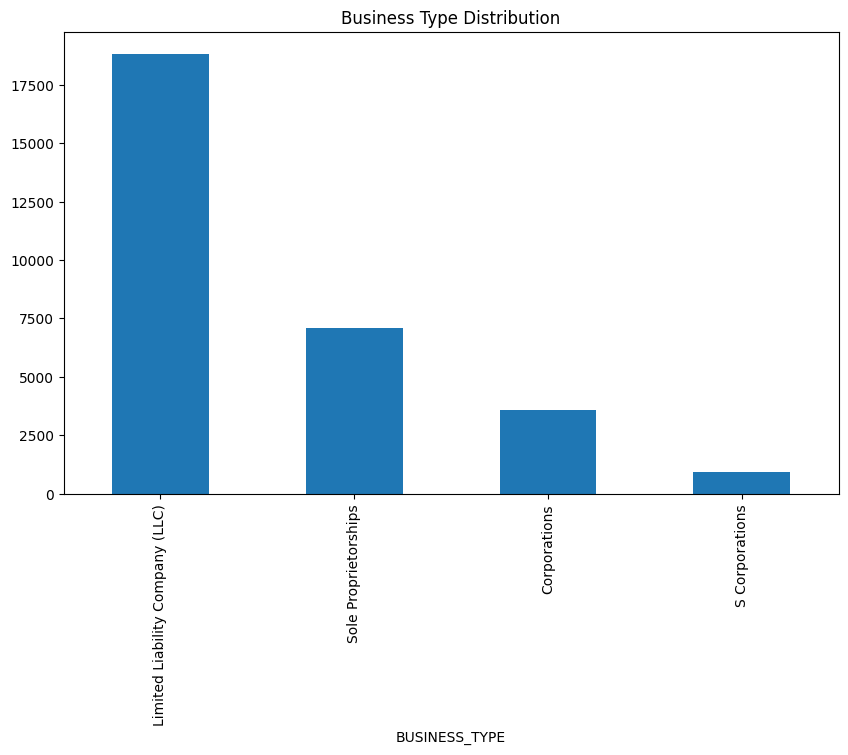

In [10]:
#BUSINESS_TYPE (STRING)
#Business structure (e.g., Corporation, LLC).
# Analyze Business Type
print(merchants['BUSINESS_TYPE'].value_counts())
merchants['BUSINESS_TYPE'].value_counts().plot(kind='bar', figsize=(10,6), title='Business Type Distribution')
plt.show()


In [11]:
#four-digit Merchant Category Code (MCC) describes the merchant's primary business activities
# Check MCC Code distribution
print(merchants['MCC_CODE'].value_counts().head(10))  # Top 10 MCC codes
print("Missing MCC codes:", merchants['MCC_CODE'].isnull().sum())

MCC_CODE
7641    285
7542    251
5945    250
5977    241
7011    131
5812    125
5712    124
4900    122
7692    120
5691    119
Name: count, dtype: int64
Missing MCC codes: 0


In [12]:
#legal Name
# Check for duplicate Legal Names and missing values
print("Number of unique legal names:", merchants['LEGAL_NAME'].nunique())
print("Missing values in LEGAL_NAME:", merchants['LEGAL_NAME'].isnull().sum())


Number of unique legal names: 30416
Missing values in LEGAL_NAME: 0


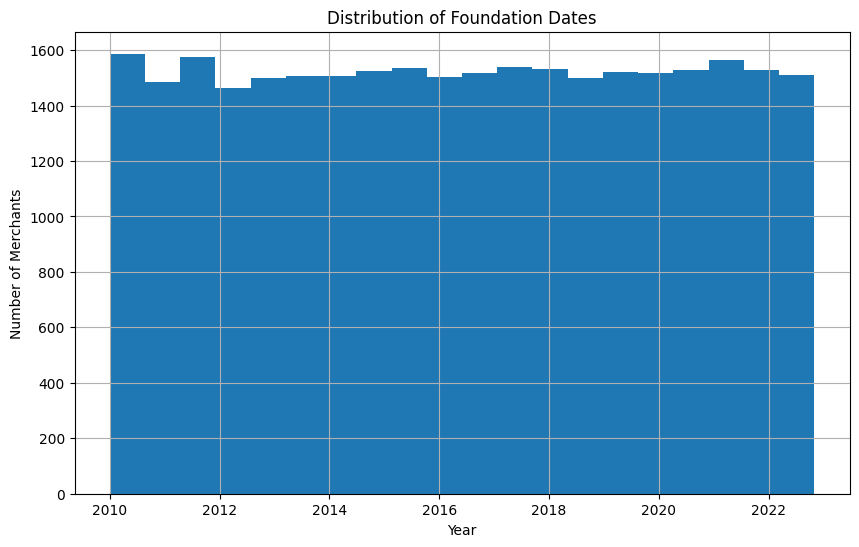

Earliest Foundation Date: 2010-01-01 00:00:00
Latest Foundation Date: 2022-10-31 00:00:00


In [13]:
#FOUNDATION_DATE (DATE)
# Convert to datetime
merchants['FOUNDATION_DATE'] = pd.to_datetime(merchants['FOUNDATION_DATE'])

# Analyze the distribution of foundation dates
merchants['FOUNDATION_DATE'].hist(bins=20, figsize=(10,6))
plt.title('Distribution of Foundation Dates')
plt.xlabel('Year')
plt.ylabel('Number of Merchants')
plt.show()

# Find the earliest and latest foundation dates
earliest_date = merchants['FOUNDATION_DATE'].min()
latest_date = merchants['FOUNDATION_DATE'].max()

print(f'Earliest Foundation Date: {earliest_date}')
print(f'Latest Foundation Date: {latest_date}')

TAX_EXCEMPT_INDICATOR
Not Exempt    27375
Exempt         3077
Name: count, dtype: int64


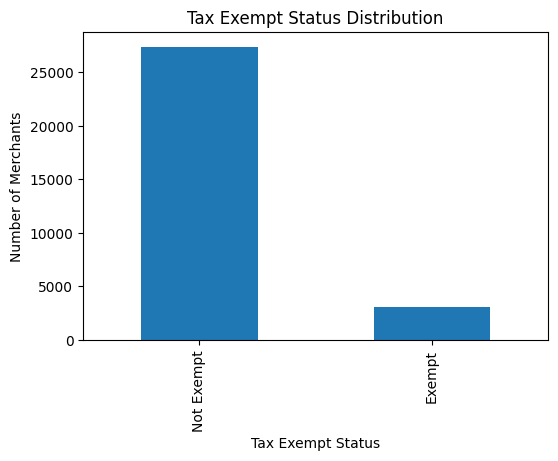

In [14]:
#TAX_EXEMPT_INDICATOR (BOOLEAN)
# Check distribution of tax exemption status
# Map True/False to Exempt/Not Exempt
merchants['TAX_EXCEMPT_INDICATOR'] = merchants['TAX_EXCEMPT_INDICATOR'].map({True: 'Exempt', False: 'Not Exempt'})

# Check distribution of tax exemption status
print(merchants['TAX_EXCEMPT_INDICATOR'].value_counts())

# Plot distribution
merchants['TAX_EXCEMPT_INDICATOR'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Tax Exempt Status Distribution')
plt.xlabel('Tax Exempt Status')
plt.ylabel('Number of Merchants')
plt.show()


OUTLET_TYPE
Face to Face                  14151
Face to Face and Ecommerce     9975
Ecommerce                      6326
Name: count, dtype: int64


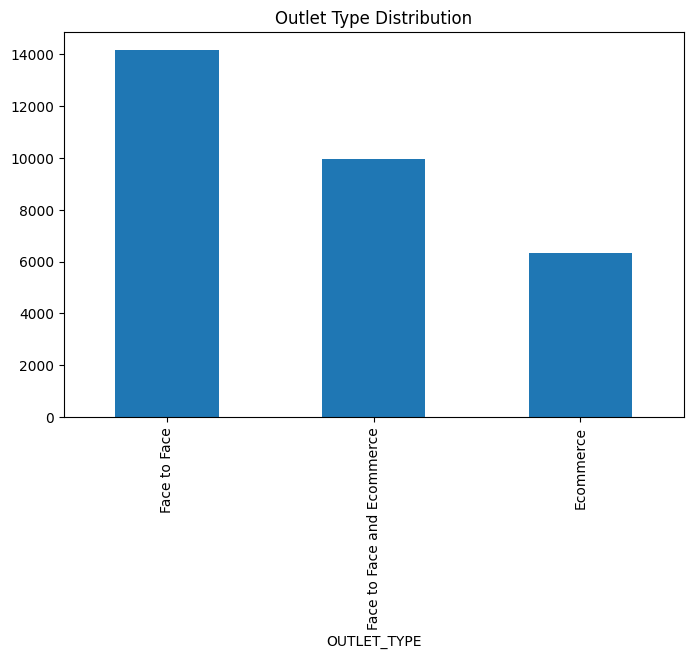

In [15]:
#OUTLET_TYPE (STRING)
# Check distribution of outlet types
print(merchants['OUTLET_TYPE'].value_counts())
merchants['OUTLET_TYPE'].value_counts().plot(kind='bar', figsize=(8,5), title='Outlet Type Distribution')
plt.show()


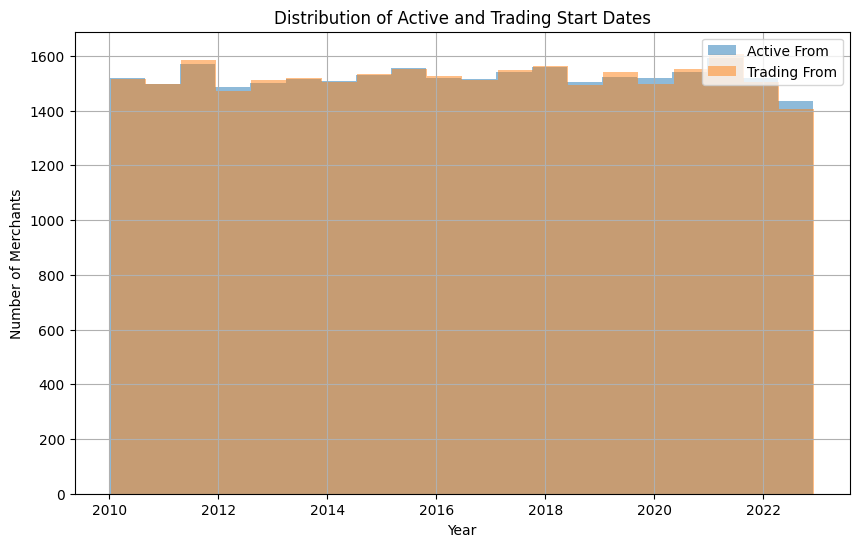

In [16]:
#ACTIVE_FROM / TRADING_FROM (DATE)
# Convert to datetime if not already done
merchants['ACTIVE_FROM'] = pd.to_datetime(merchants['ACTIVE_FROM'])
merchants['TRADING_FROM'] = pd.to_datetime(merchants['TRADING_FROM'])

# Analyze the distribution of ACTIVE_FROM and TRADING_FROM
merchants['ACTIVE_FROM'].hist(bins=20, figsize=(10,6), alpha=0.5, label='Active From')
merchants['TRADING_FROM'].hist(bins=20, figsize=(10,6), alpha=0.5, label='Trading From')
plt.title('Distribution of Active and Trading Start Dates')
plt.xlabel('Year')
plt.ylabel('Number of Merchants')
plt.legend()
plt.show()

#These dates represent when the merchant became active and when they started trading.



       ANNUAL_TURNOVER_CARD  ANNUAL_TURNOVER
count          3.045200e+04     3.045200e+04
mean           3.561982e+07     5.091838e+07
std            1.048610e+08     1.456736e+08
min            3.000000e+01     4.600000e+01
25%            1.439368e+05     2.109472e+05
50%            3.070015e+05     4.649730e+05
75%            5.128090e+05     6.981788e+05
max            1.030432e+09     1.163046e+09


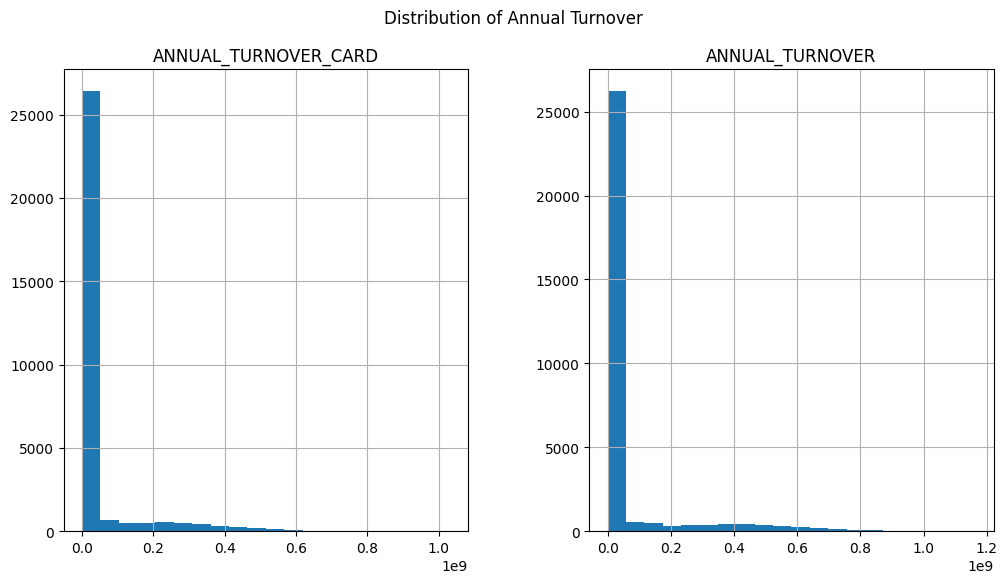

In [17]:
#ANNUAL_TURNOVER_CARD / ANNUAL_TURNOVER (INTEGER)
# Summary statistics for turnover columns
print(merchants[['ANNUAL_TURNOVER_CARD', 'ANNUAL_TURNOVER']].describe())

# Plot distribution for card and total turnover
merchants[['ANNUAL_TURNOVER_CARD', 'ANNUAL_TURNOVER']].hist(bins=20, figsize=(12,6))
plt.suptitle('Distribution of Annual Turnover')
plt.show()



count    30452.000000
mean       301.953172
std       1829.031948
min          0.000000
25%         64.000000
50%        102.000000
75%        151.000000
max      45822.000000
Name: AVERAGE_TICKET_SALE_AMOUNT, dtype: float64


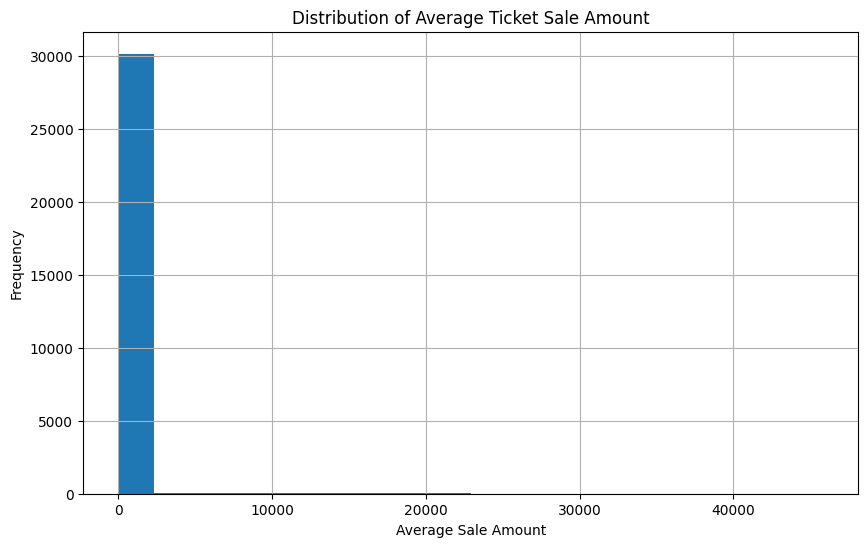

In [18]:
#AVERAGE_TICKET_SALE_AMOUNT (INTEGER)
# Summary statistics for Average Ticket Sale Amount
print(merchants['AVERAGE_TICKET_SALE_AMOUNT'].describe())

# Plot distribution for Average Ticket Sale Amount
merchants['AVERAGE_TICKET_SALE_AMOUNT'].hist(bins=20, figsize=(10,6))
plt.title('Distribution of Average Ticket Sale Amount')
plt.xlabel('Average Sale Amount')
plt.ylabel('Frequency')
plt.show()




       PAYMENT_PERCENTAGE_FACE_TO_FACE  PAYMENT_PERCENTAGE_ECOM  \
count                     30452.000000             30452.000000   
mean                         62.689117                35.881157   
std                          19.135247                18.387360   
min                           6.000000                 0.000000   
25%                          47.000000                23.000000   
50%                          61.000000                37.000000   
75%                          76.000000                51.000000   
max                         100.000000                65.000000   

       PAYMENT_PERCENTAGE_MOTO  
count             30452.000000  
mean                  1.429725  
std                   5.130598  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%                   0.000000  
max                  30.000000  


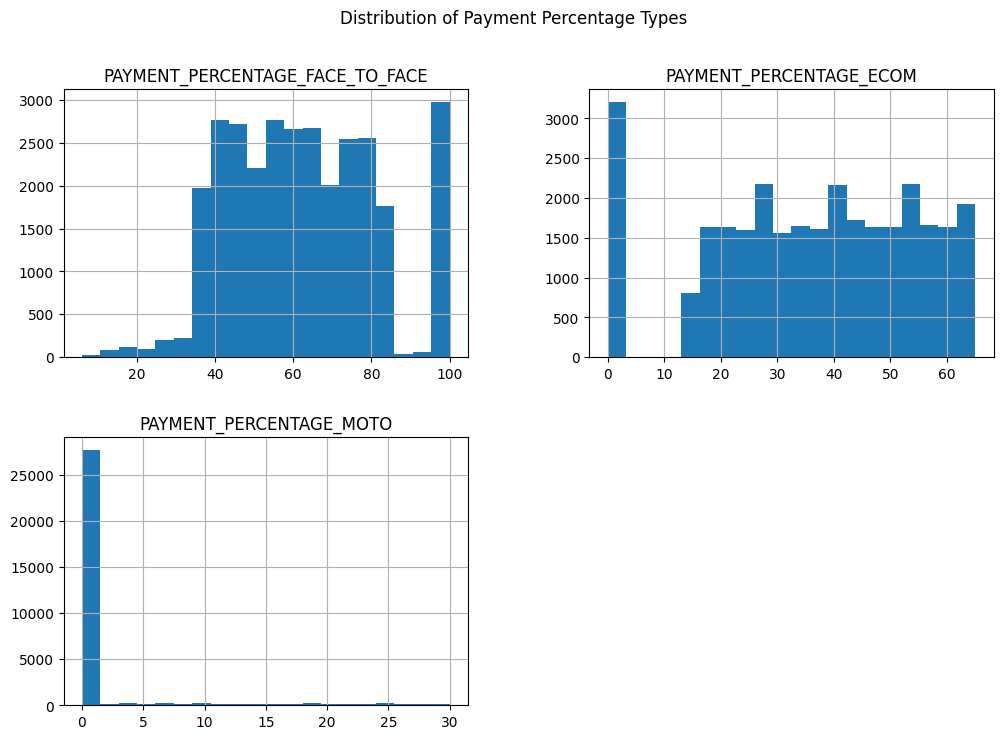

In [19]:
#PAYMENT PERCENTAGE COLUMNS
# Summary statistics for payment percentage columns
print(merchants[['PAYMENT_PERCENTAGE_FACE_TO_FACE', 'PAYMENT_PERCENTAGE_ECOM', 'PAYMENT_PERCENTAGE_MOTO']].describe())

# Plot distributions
merchants[['PAYMENT_PERCENTAGE_FACE_TO_FACE', 'PAYMENT_PERCENTAGE_ECOM', 'PAYMENT_PERCENTAGE_MOTO']].hist(bins=20, figsize=(12,8))
plt.suptitle('Distribution of Payment Percentage Types')
plt.show()


       DEPOSIT_REQUIRED_PERCENTAGE  DEPOSIT_PERCENTAGE
count                 30452.000000        30452.000000
mean                     49.475864           49.442138
std                      28.997715           28.450437
min                       0.000000            0.000000
25%                      24.000000           25.000000
50%                      49.000000           49.000000
75%                      75.000000           74.000000
max                      99.000000           99.000000


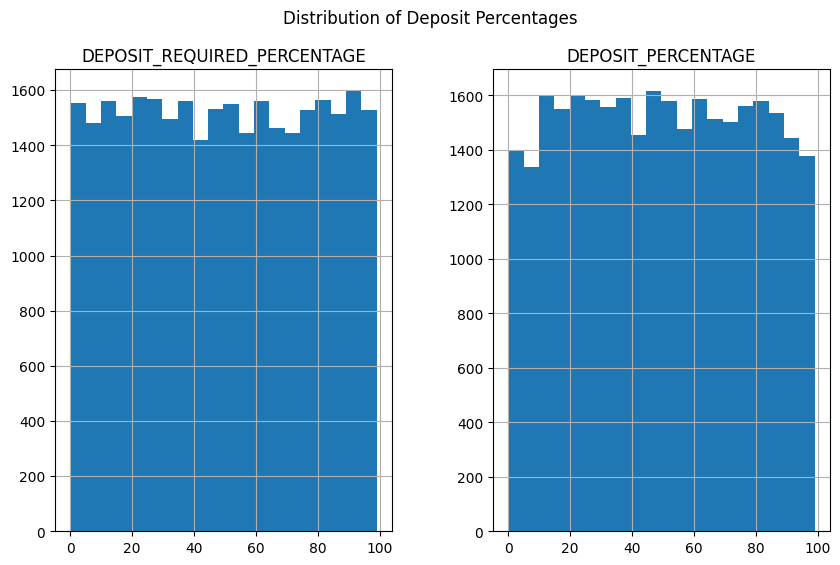

In [20]:
#DEPOSIT_REQUIRED_PERCENTAGE / DEPOSIT_PERCENTAGE (INTEGER)
# Summary statistics for deposit percentages
print(merchants[['DEPOSIT_REQUIRED_PERCENTAGE', 'DEPOSIT_PERCENTAGE']].describe())

# Plot distributions for deposit percentages
merchants[['DEPOSIT_REQUIRED_PERCENTAGE', 'DEPOSIT_PERCENTAGE']].hist(bins=20, figsize=(10,6))
plt.suptitle('Distribution of Deposit Percentages')
plt.show()


       DELIVERY_SAME_DAYS_PERCENTAGE  DELIVERY_WEEK_ONE_PERCENTAGE  \
count                   30452.000000                  30452.000000   
mean                       24.133686                     25.344509   
std                         3.768431                      6.689108   
min                         5.000000                     20.000000   
25%                        22.000000                     22.000000   
50%                        24.000000                     25.000000   
75%                        27.000000                     27.000000   
max                        29.000000                     84.000000   

       DELIVERY_WEEK_TWO_PERCENTAGE  DELIVERY_OVER_TWO_WEEKS_PERCENTAGE  
count                  30452.000000                        30452.000000  
mean                      24.013332                           26.508472  
std                        4.236609                            5.127589  
min                        0.000000                            4.000000  

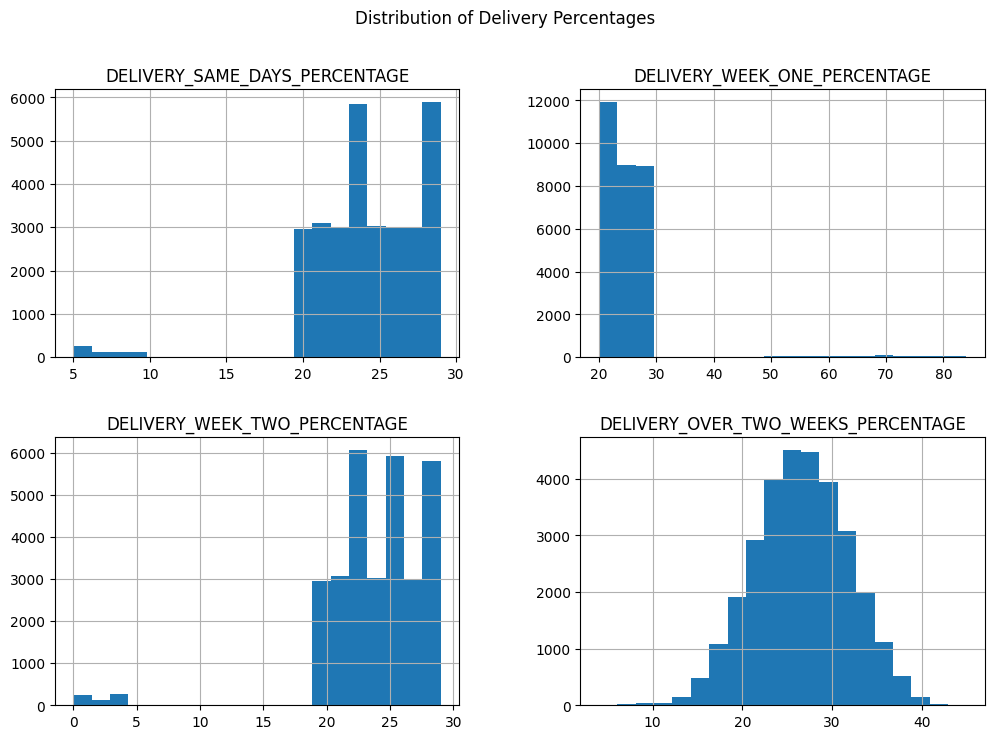

In [21]:
# Summary statistics for delivery percentage columns
print(merchants[['DELIVERY_SAME_DAYS_PERCENTAGE', 'DELIVERY_WEEK_ONE_PERCENTAGE', 
                 'DELIVERY_WEEK_TWO_PERCENTAGE', 'DELIVERY_OVER_TWO_WEEKS_PERCENTAGE']].describe())

# Plot distributions for delivery percentage columns
merchants[['DELIVERY_SAME_DAYS_PERCENTAGE', 'DELIVERY_WEEK_ONE_PERCENTAGE', 
           'DELIVERY_WEEK_TWO_PERCENTAGE', 'DELIVERY_OVER_TWO_WEEKS_PERCENTAGE']].hist(bins=20, figsize=(12,8))
plt.suptitle('Distribution of Delivery Percentages')
plt.show()


Transactions Train dataset shape: (1066440, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066440 entries, 0 to 1066439
Data columns (total 21 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   TX_ID                                  1066440 non-null  object 
 1   TX_TS                                  1066440 non-null  object 
 2   CUSTOMER_ID                            1066440 non-null  int64  
 3   TERMINAL_ID                            1066440 non-null  int64  
 4   TX_AMOUNT                              1066440 non-null  float64
 5   TX_FRAUD                               1066440 non-null  int64  
 6   TRANSACTION_GOODS_AND_SERVICES_AMOUNT  1066440 non-null  float64
 7   TRANSACTION_CASHBACK_AMOUNT            1066440 non-null  float64
 8   CARD_EXPIRY_DATE                       1066440 non-null  object 
 9   CARD_DATA                              1066440 non-null  object 

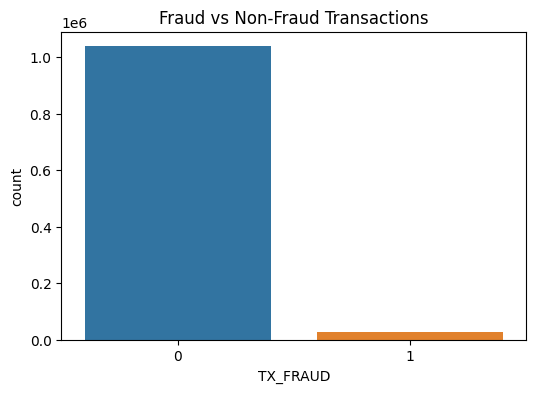

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


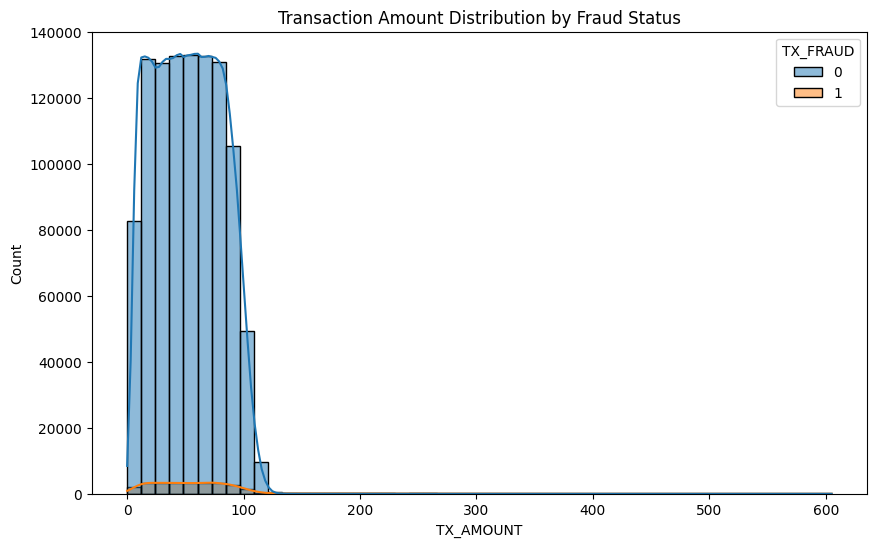

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


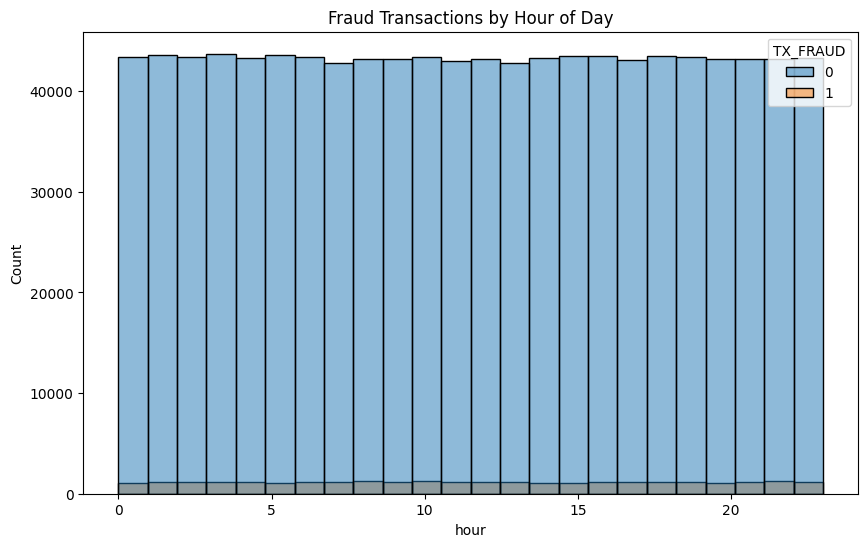

In [22]:
# Transactions_train dataset overview
print("Transactions Train dataset shape:", transactions_train.shape)
print(transactions_train.info())
print(transactions_train.describe())

# Checking for missing values
print("Missing values in Transactions Train dataset:")
print(transactions_train.isnull().sum())

# Visualizing fraud vs non-fraud distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='TX_FRAUD', data=transactions_train)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

# Visualizing transaction amount distribution for fraud vs non-fraud
plt.figure(figsize=(10, 6))
sns.histplot(data=transactions_train, x='TX_AMOUNT', hue='TX_FRAUD', bins=50, kde=True)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.show()

# Time-based analysis of fraud occurrences
transactions_train['TX_TS'] = pd.to_datetime(transactions_train['TX_TS'])
transactions_train['hour'] = transactions_train['TX_TS'].dt.hour

plt.figure(figsize=(10, 6))
sns.histplot(data=transactions_train, x='hour', hue='TX_FRAUD', bins=24, kde=False)
plt.title('Fraud Transactions by Hour of Day')
plt.show()


Transactions Test dataset shape: (71139, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71139 entries, 0 to 71138
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   TX_ID                                  71139 non-null  object 
 1   TX_TS                                  71139 non-null  object 
 2   CUSTOMER_ID                            71139 non-null  int64  
 3   TERMINAL_ID                            71139 non-null  int64  
 4   TX_AMOUNT                              71139 non-null  float64
 5   TRANSACTION_GOODS_AND_SERVICES_AMOUNT  71139 non-null  float64
 6   TRANSACTION_CASHBACK_AMOUNT            71139 non-null  float64
 7   CARD_EXPIRY_DATE                       71139 non-null  object 
 8   CARD_DATA                              71139 non-null  object 
 9   CARD_BRAND                             71139 non-null  object 
 10  TRANSACTION_TYPE         

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


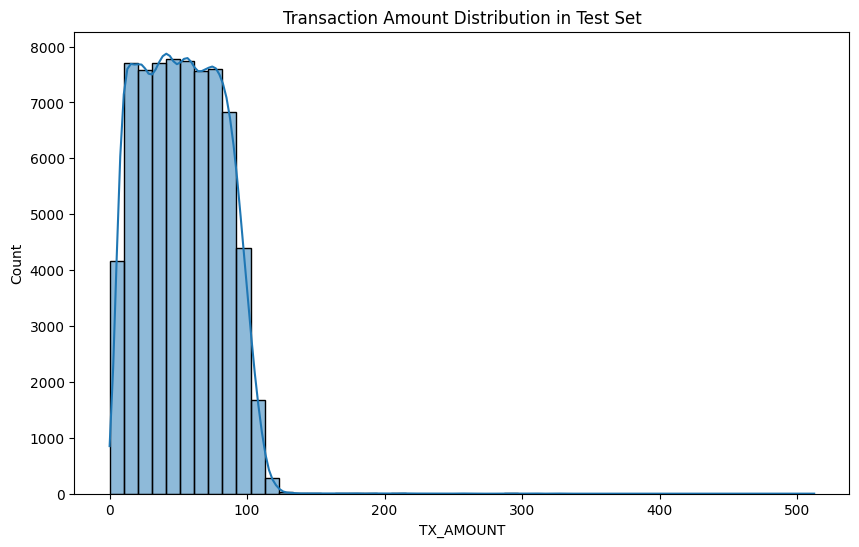

In [23]:
# Transactions_test dataset overview
print("Transactions Test dataset shape:", transactions_test.shape)
print(transactions_test.info())
print(transactions_test.describe())

# Checking for missing values
print("Missing values in Transactions Test dataset:")
print(transactions_test.isnull().sum())

# Visualizing transaction amount distribution in test set
plt.figure(figsize=(10, 6))
sns.histplot(data=transactions_test, x='TX_AMOUNT', bins=50, kde=True)
plt.title('Transaction Amount Distribution in Test Set')
plt.show()
